#Call Libraries and Download csv File

In [0]:
from google.colab import files
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# import the modules we'll need
from IPython.display import HTML
import base64
from smart_open import open
import io
# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
import urllib.request  # the lib that handles the url stuff
import seaborn as sns
from scipy import stats

uploaded = files.upload()

df2 = pd.read_csv(io.BytesIO(uploaded['Military Expenditure.csv']))
# Dataset is now stored in a Pandas Dataframe
#print(df2.info())

Saving Military Expenditure.csv to Military Expenditure.csv


# Create csv download to look at if needed

In [0]:
def create_download_link(df, title = "Download Original CSV File Here", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)
#df = pd.read_csv('C:\Users\C560521\Desktop\AB_NYC_2019.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
#print(df2.head(5))
#print(df2.columns)
# create a link to download the dataframe
create_download_link(df2)
# ↓ ↓ ↓download link! ↓ ↓ ↓ 


# Manipulate Data Frame to get values to be analyzed

In [0]:
def calculate_for_inflation(df,columns,years):
  # Googled average value of inflation for world to be 3.41%
  # calculation for past money to todays money is the point of this function
  # FORMULA : TODAYS_DOLLARS = Principle*(1+inflation_rate)^(Number_of_years)
  # columns = range of columns to be calculated. Must be in chronological order
  # df = data frame used with column range
  inflation = 0.0341
  
  for x in columns:
    # note 2020 is 25 years past 1995 and 1995 starts in column 1 
    #(1+inflation_rate)^(Number_of_years) = value
    
    value = (1+inflation)**(years)
    # now multiply column by value
    # value * principle = TODAYS_DOLLARS 
    df.iloc[:,x] = df.iloc[:,x]*value
    years -= 1
    # now x should go up to the next value, until the last column year = 2018
  # return new df
  return df

In [0]:
# do not need "years 1960 to 1994" for this review so they were taken out 
# order by country because those are the ones that matter for analysis
# once we have only the countries we can remove this column too 


df1 = df2[(df2['Type'] == 'Country')]
l = list(range(1,39)) #1960 to 1994 & unneeded non year columns
df = df1.drop(df1.columns[l] , axis = 1) #drop unneeded columns
df = df.dropna() # drop Naan's 
print('this is the starting dataframe:\n\n')
print(df.info())



# now we have 115 rows with columns with years between 1995-2018
# range used for inflation calculator 
# a is years 1995 to 2018 
a = list(range(1,25))  
# now calculate inflation rate between 1995 and 2018 (25 years between 1995 and 2020)
years = 25
df_inf = calculate_for_inflation(df,a,years)

# now calculate the sums of the date ranges in question 
d = list(range(1,5)) #1995 to 2000 (Jan 1 2000)
e = list(range(6,10)) # 2000 to 2005
f = list(range(11,15)) # 2005 to 2010
g = list(range(16,20)) # 2010 to 2015
h = list(range(1,10)) # 1995 to 2005
i = list(range(11,20)) # 2005 to 2015 

# ADD COLUMNS THAT HAVE SUMS FOR RANGES IN QUESTION
df_inf['sum_95_2000'] = df.iloc[:,d].sum(axis=1)
df_inf['sum_00_2005'] = df.iloc[:,e].sum(axis=1)
df_inf['sum_05_2010'] = df.iloc[:,f].sum(axis=1)
df_inf['sum_10_2015'] = df.iloc[:,g].sum(axis=1)
df_inf['sum_95_2005'] = df.iloc[:,h].sum(axis=1)
df_inf['sum_05_2015'] = df.iloc[:,i].sum(axis=1)

l = list(range(1,25))
# drop columns that arent needed now that we have the sums 
df_filtered = df_inf.drop(df.columns[l] , axis = 1)

print('\n\nNew dataframe with decades and 5 year periods for purposes of analysis:\n')
print(df_filtered.info())


this is the starting dataframe:


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 2 to 261
Data columns (total 25 columns):
Name    115 non-null object
1995    115 non-null float64
1996    115 non-null float64
1997    115 non-null float64
1998    115 non-null float64
1999    115 non-null float64
2000    115 non-null float64
2001    115 non-null float64
2002    115 non-null float64
2003    115 non-null float64
2004    115 non-null float64
2005    115 non-null float64
2006    115 non-null float64
2007    115 non-null float64
2008    115 non-null float64
2009    115 non-null float64
2010    115 non-null float64
2011    115 non-null float64
2012    115 non-null float64
2013    115 non-null float64
2014    115 non-null float64
2015    115 non-null float64
2016    115 non-null float64
2017    115 non-null float64
2018    115 non-null float64
dtypes: float64(24), object(1)
memory usage: 23.4+ KB
None


New dataframe with decades and 5 year periods for purposes of analysis:

<cl

# Now that there is an updated DataFrame, with values calculated to Todays Dollars. See if there is a statistic correlation between values

NOTICE HOW ALL HISTOGRAMS BELOW DO NOT LOOK NORMALLY DISTRIBUTED 


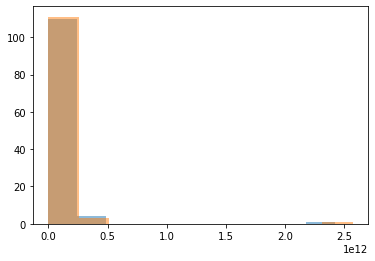

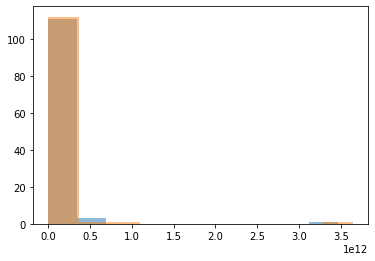

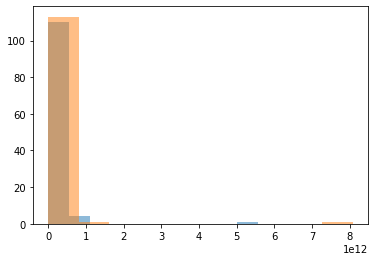

Check the other descriptions to confirm this is not normally distrubuted


TEST
 descriptions of all columns below (specifically kurtosis and skewness) confirm this is not normally distrubuted


---->
DescribeResult(nobs=115, minmax=(0.0, 2420945346672.838), mean=52681394729.08412, variance=5.453699305881216e+22, skewness=9.260822942511286, kurtosis=90.69296806302569)
DescribeResult(nobs=115, minmax=(0.0, 2569107246069.5723), mean=49551701143.01308, variance=5.967145208073609e+22, skewness=9.696953047832716, kurtosis=97.18295113515606)
DescribeResult(nobs=115, minmax=(0.0, 3466055860378.603), mean=67697991481.941315, variance=1.084247681755394e+23, skewness=9.710431648595627, kurtosis=97.42136200751143)
DescribeResult(nobs=115, minmax=(0.0, 3642606001094.7183), mean=76567837300.8078, variance=1.2325349705740853e+23, skewness=9.31796636708777, kurtosis=91.35557967881282)
DescribeResult(nobs=115, minmax=(0.0, 5558276654986.785), mean=114223345512.22327, variance=2.829595841165793e+23, sk

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

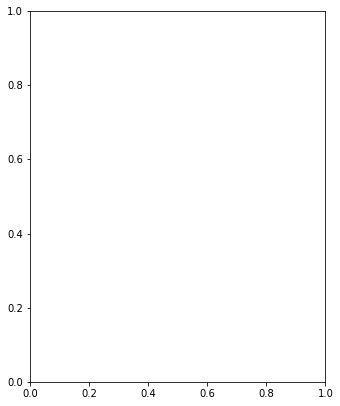

In [0]:
# Given the data set without null values how do decades/ half decades correlate with eachother statistically?
# First need to check to see if the data seems normal or non normally distributed


print('NOTICE HOW ALL HISTOGRAMS BELOW DO NOT LOOK NORMALLY DISTRIBUTED ')
plt.hist(df_filtered['sum_95_2000'], alpha = .5)
plt.hist(df_filtered['sum_00_2005'], alpha = .5)
plt.show()
plt.hist(df_filtered['sum_05_2010'], alpha = .5)
plt.hist(df_filtered['sum_10_2015'], alpha = .5)
plt.show()
plt.hist(df_filtered['sum_95_2005'], alpha = .5)
plt.hist(df_filtered['sum_05_2015'], alpha = .5)
plt.show()

print('Check the other descriptions to confirm this is not normally distrubuted')
lf = df_filtered # just so its easier to type

stats.ttest_ind(df_filtered['sum_95_2000'], df_filtered['sum_00_2005'])
print('\n\nTEST')
print(' descriptions of all columns below (specifically kurtosis and skewness) confirm this is not normally distrubuted\n\n')
print('---->')
print(stats.describe(lf['sum_95_2000']))
print(stats.describe(lf['sum_00_2005']))
print(stats.describe(lf['sum_05_2010']))
print(stats.describe(lf['sum_10_2015']))
print(stats.describe(lf['sum_95_2005']))
print(stats.describe(lf['sum_05_2015']))
print('---->')

plt.figure(figsize=(18,15))
plt.subplot(2, 3,1)
plt.hist(np.log(lf['sum_95_2000']))
plt.title("histogram of subscribers (log transformed)")

plt.subplot(2, 3, 2)
plt.hist(np.log(lf['sum_00_2005']))
plt.title("histogram of video uploads (log transformed)")

plt.subplot(2, 3, 3)
plt.hist(np.log(lf['sum_05_2010']))
plt.title("histogram of video views (log transformed)")
print('\n\n now it is time to statistically test significance using a non normal "wilcoxon()" function/method')
# use wilcoxon texting because This is a A/B test where all participants (countries) experience both versions (years).
# Also use wilcoxon because this is not normally distributed as shown above.



now statistically test significance using non normal "wilcoxon()" function/method


Based on the Wilcoxon Result below there is statistical significance showing that in the 5 year periods the rankings are:
With 1 being the most spent on military, and 4 being the least 

1) 2010 - 2015
2) 2005 - 2010
3) 1995 - 2000
4) 2000 - 2005 

Based on the Wilcoxon Result below there is statistical significance showing that in the two decades the rankings are:
With 1 being the most spent on military , and 2 being the least

1) 2005 - 2015 
2) 1995 - 2005 



statistical testing of the two decades in question (2005 - 2015) and (1995 - 2005)
As you can see the two decades statistically reject the null and the difference has significance

WilcoxonResult(statistic=714.0, pvalue=6.933885861716307e-13)


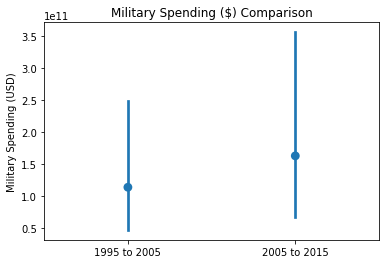



statistical testing of the four half decades in question (1995-2000),(2000-2005),(2005-2010),(2010-2015)
As you can see all the 5 year periods have p values that statistically reject the null and the difference has significance

statistical testing of  (95-00) and (05-10)
WilcoxonResult(statistic=1933.0, pvalue=0.00022559135860008217)


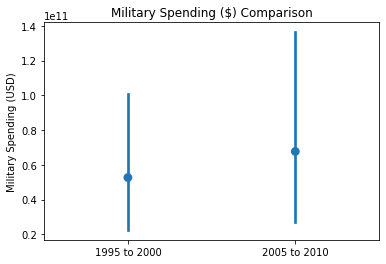


statistical testing of the four decades in question (95-00) AND (10-15)
WilcoxonResult(statistic=1369.0, pvalue=1.1313129631503394e-07)


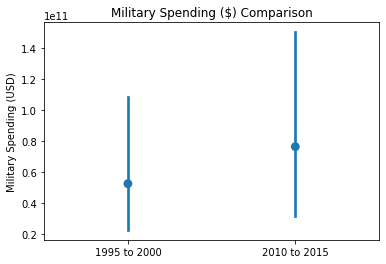


statistical testing of the two half decades (95-00) and (00-05)
WilcoxonResult(statistic=1679.0, pvalue=1.0047079629195533e-05)


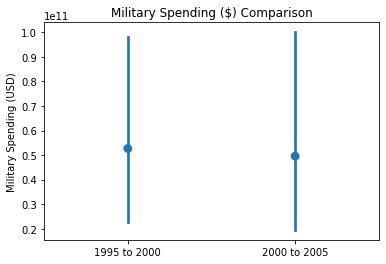


statistical testing of the two half decades (00-05) and (05-10)
WilcoxonResult(statistic=379.0, pvalue=6.2056948681910165e-16)


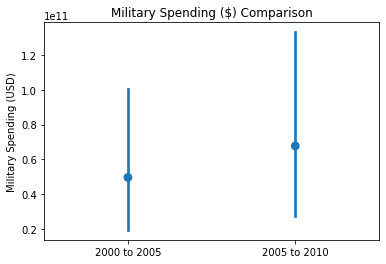


statistical testing of the two half decades (00-05) and (10-15)
WilcoxonResult(statistic=224.0, pvalue=1.3991896902351155e-17)


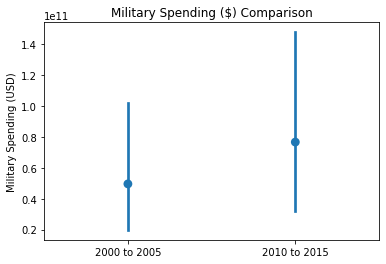


statistical testing of the two half decades(05-10) and (10-15)
WilcoxonResult(statistic=1790.0, pvalue=6.638113422708329e-05)


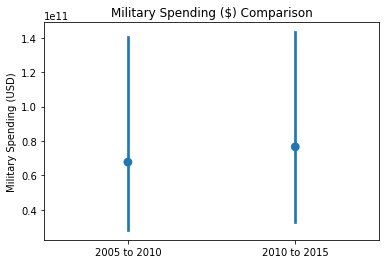

In [0]:

# use wilcoxon texting because This is a A/B test where all participants (countries) experience both versions (years).
# Also use wilcoxon because this is not normally distributed as shown above. 
print('\n\nnow statistically test significance using non normal "wilcoxon()" function/method\n\n')
print('Based on the Wilcoxon Result below there is statistical significance showing that in the 5 year periods the rankings are:')
print('With 1 being the most spent on military, and 4 being the least \n')
print('1) 2010 - 2015')
print('2) 2005 - 2010')
print('3) 1995 - 2000')
print('4) 2000 - 2005 \n')

print('Based on the Wilcoxon Result below there is statistical significance showing that in the two decades the rankings are:')
print('With 1 being the most spent on military , and 2 being the least\n')
print('1) 2005 - 2015 ')
print('2) 1995 - 2005 ')

print('\n\n\nstatistical testing of the two decades in question (2005 - 2015) and (1995 - 2005)')
print('As you can see the two decades statistically reject the null and the difference has significance\n')


print(stats.wilcoxon((lf['sum_05_2015']-lf['sum_95_2005'])))
g = sns.pointplot(data=[df_filtered['sum_95_2005'],
                        df_filtered['sum_05_2015']], join=False)  
g.set(xticklabels = ['1995 to 2005', '2005 to 2015'])
plt.title('Military Spending ($) Comparison')
plt.ylabel('Military Spending (USD)')
plt.show()
#print(stats.ttest_rel(lf['sum_05_2015'],lf['sum_95_2005']))

print('\n\nstatistical testing of the four half decades in question (1995-2000),(2000-2005),(2005-2010),(2010-2015)')
print('As you can see all the 5 year periods have p values that statistically reject the null and the difference has significance')

#print(stats.kruskal(lf['sum_05_2010'],lf['sum_95_2000'],lf['sum_00_2005'],lf['sum_10_2015']))

print('\nstatistical testing of  (95-00) and (05-10)')
print(stats.wilcoxon((lf['sum_05_2010']-lf['sum_95_2000'])))
#print(stats.ttest_rel(lf['sum_05_2010'],lf['sum_95_2000']))
g = sns.pointplot(data=[df_filtered['sum_95_2000'],
                        df_filtered['sum_05_2010']], join=False)  
g.set(xticklabels = ['1995 to 2000', '2005 to 2010'])
plt.title('Military Spending ($) Comparison')
plt.ylabel('Military Spending (USD)')
plt.show()


print('\nstatistical testing of the four decades in question (95-00) AND (10-15)')
print(stats.wilcoxon((lf['sum_10_2015']-lf['sum_95_2000'])))
#print(stats.ttest_rel(lf['sum_10_2015'],lf['sum_95_2000']))
g = sns.pointplot(data=[df_filtered['sum_95_2000'],
                        df_filtered['sum_10_2015']], join=False)  
g.set(xticklabels = ['1995 to 2000', '2010 to 2015'])
plt.title('Military Spending ($) Comparison')
plt.ylabel('Military Spending (USD)')
plt.show()


print('\nstatistical testing of the two half decades (95-00) and (00-05)')
print(stats.wilcoxon((lf['sum_00_2005']-lf['sum_95_2000'])))
#print(stats.ttest_rel(lf['sum_00_2005'],lf['sum_95_2000']))
g = sns.pointplot(data=[df_filtered['sum_95_2000'],
                        df_filtered['sum_00_2005']], join=False)  
g.set(xticklabels = ['1995 to 2000', '2000 to 2005'])
plt.title('Military Spending ($) Comparison')
plt.ylabel('Military Spending (USD)')
plt.show()

print('\nstatistical testing of the two half decades (00-05) and (05-10)')
print(stats.wilcoxon((lf['sum_05_2010']-lf['sum_00_2005'])))
#print(stats.ttest_rel(lf['sum_05_2010'],lf['sum_00_2005']))
g = sns.pointplot(data=[df_filtered['sum_00_2005'],
                        df_filtered['sum_05_2010']], join=False)  
g.set(xticklabels = ['2000 to 2005', '2005 to 2010'])
plt.title('Military Spending ($) Comparison')
plt.ylabel('Military Spending (USD)')
plt.show()


print('\nstatistical testing of the two half decades (00-05) and (10-15)')
print(stats.wilcoxon((lf['sum_00_2005']-lf['sum_10_2015'])))
#print(stats.ttest_rel(lf['sum_00_2005'],lf['sum_10_2015']))
g = sns.pointplot(data=[df_filtered['sum_00_2005'],
                        df_filtered['sum_10_2015']], join=False)  
g.set(xticklabels = ['2000 to 2005', '2010 to 2015'])
plt.title('Military Spending ($) Comparison')
plt.ylabel('Military Spending (USD)')
plt.show()


print('\nstatistical testing of the two half decades(05-10) and (10-15)')
print(stats.wilcoxon((lf['sum_05_2010']-lf['sum_10_2015'])))
#print(stats.ttest_rel(lf['sum_05_2010'],lf['sum_10_2015']))
g = sns.pointplot(data=[df_filtered['sum_05_2010'],
                        df_filtered['sum_10_2015']], join=False)  
g.set(xticklabels = ['2005 to 2010', '2010 to 2015'])
plt.title('Military Spending ($) Comparison')
plt.ylabel('Military Spending (USD)')
plt.show()


#print(stats.ttest_ind(lf['sum_05_2015'],lf['sum_95_2005']))
#print(stats.mannwhitneyu(lf['sum_05_2015'],lf['sum_95_2005']))
#print(stats.median_test(lf['sum_05_2015'],lf['sum_95_2005']))
#print(stats.f_oneway(lf['sum_05_2015'],lf['sum_95_2005']))


# Data Visualizations

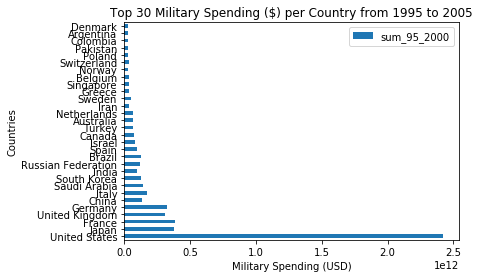

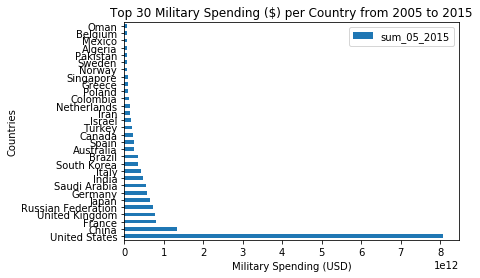



 1995 to 2000


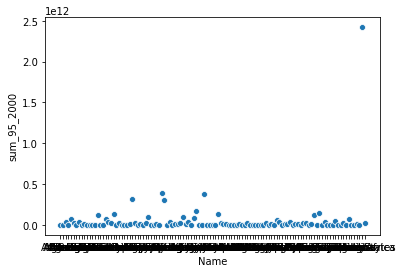

set plot limits to see how other countries have changed besides United States : 



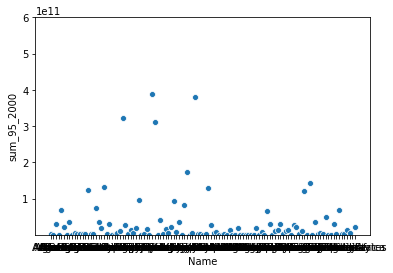



2000 to 2005


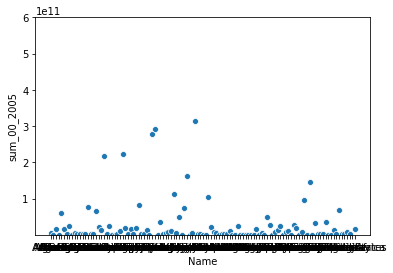



2005 to 2010


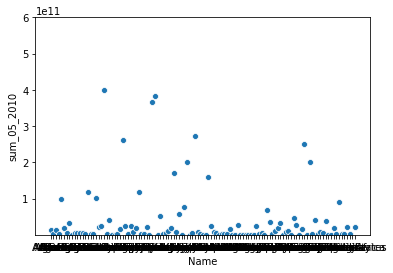



2010 to 2015


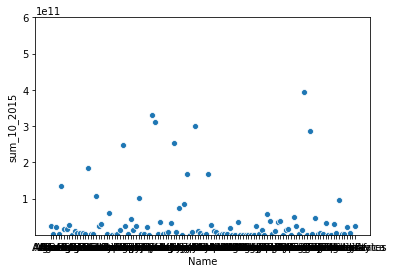



1995 to 2005


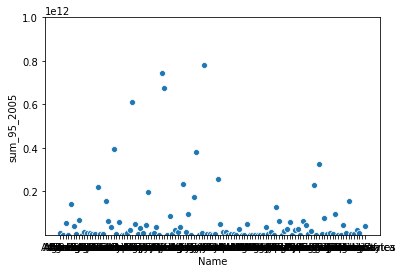



2005 to 2015


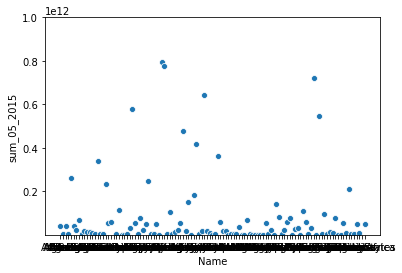

"\nsns.boxplot(x=lf['sum_95_2000'])\nplt.show()\nsns.boxplot(x=lf['sum_00_2005'])\nplt.show()\nsns.boxplot(x=lf['sum_10_2015'])\nplt.show()\nsns.boxplot(x=lf['sum_05_2010'])\nplt.show()\nsns.boxplot(x=lf['sum_95_2005'])\nplt.show()\nsns.boxplot(x=lf['sum_05_2015'])\nplt.show()\n"

In [0]:
b = 5*(10**6) # value for y axis scatter plot 
c = 1*(10**12) # value for y axis scatter plot 
d = .6*(10**12) # value for y axis scatter plot 

kf = lf.sort_values(by ='sum_95_2005', axis=0 ,ascending=False)
kf.head(30).plot.barh(x = 'Name' , y = 'sum_95_2000')
plt.title('Top 30 Military Spending ($) per Country from 1995 to 2005')
plt.xlabel('Military Spending (USD)')
plt.ylabel('Countries')

plt.show()

pf = lf.sort_values(by ='sum_05_2015', axis=0 ,ascending=False)
pf.head(30).plot.barh(x = 'Name' , y = 'sum_05_2015')
plt.title('Top 30 Military Spending ($) per Country from 2005 to 2015')
plt.xlabel('Military Spending (USD)')
plt.ylabel('Countries')
plt.show()

print('\n\n 1995 to 2000')
sns.scatterplot(x="Name", y="sum_95_2000",  data=lf);
plt.show()

print('set plot limits to see how other countries have changed besides United States : \n')
sns.scatterplot(x="Name", y="sum_95_2000",  data=lf);
plt.ylim([b, d])
plt.show()

print('\n')
print('2000 to 2005')
sns.scatterplot(x="Name", y="sum_00_2005",  data=lf);
plt.ylim([b, d])
plt.show()


print('\n')
print('2005 to 2010')
sns.scatterplot(x="Name", y="sum_05_2010",  data=lf);
plt.ylim([b, d])
plt.show()


print('\n')
print('2010 to 2015')
sns.scatterplot(x="Name", y="sum_10_2015",  data=lf);
plt.ylim([b, d])
plt.show()


print('\n')
print('1995 to 2005')
sns.scatterplot(x="Name", y="sum_95_2005",  data=lf);
plt.ylim([b, c])
plt.show()


print('\n')
print('2005 to 2015')
sns.scatterplot(x="Name", y="sum_05_2015",  data=lf);
plt.ylim([b, c])
plt.show()
#print('Boxplots are skewed due to United States')
'''
sns.boxplot(x=lf['sum_95_2000'])
plt.show()
sns.boxplot(x=lf['sum_00_2005'])
plt.show()
sns.boxplot(x=lf['sum_10_2015'])
plt.show()
sns.boxplot(x=lf['sum_05_2010'])
plt.show()
sns.boxplot(x=lf['sum_95_2005'])
plt.show()
sns.boxplot(x=lf['sum_05_2015'])
plt.show()
'''

# As you can See the United states are the largest contributor to world wide military spending as shown in the plots/barcharts above. It is shown that united states military spending directly effects overall world military spending. It has spent 4 times more on its military than the 2nd country in both decades (1995 to 2005) and (2005 to 2015). From the data set provided it is shown that there was a growth in Military from the 1995 decade to the 2005 decade. From the graphs you can infer that the United states grew its spending by 4 times between the two decades. 